# Exercise 1 
### Group 2501:
* Bortolato Angela  |   matr. 2156562
* Fasiolo Giorgia   |   matr. TO FILL!!!!
* Volpi Luca    |   matr.
* Zara Miriam   |   matr.

#### Imports

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner 
from keras.optimizers import Adam, RMSprop, Nadam

#import matplotlib as mpl
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 13

%run useful.py

# training data
perc_train = 0.8

### Load, standardize and split data

In [3]:
# Keras works with numpy arrays: just use them from the start

TYPE=3
# data point size
L=8 
# span of each component
B=10
x = np.loadtxt(filename("data",L,TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",L,TYPE), delimiter=' ')
y = y.astype("int")
N = len(x)
# average and std.dev.
x_mean = np.mean(x,axis=0)
x_std  = np.std(x,axis=0)
# dim. of a sample
L = len(x[0])
N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')
#plot_data(x,y)


data: 2000
train: 1600


In [4]:
#print("before rescaling:\nmean value=", x_mean,"\nstd. dev.=",x_std)
def Standardize(x,m,s):
    """
    rescale each component using its mean and standard deviation
    """
    N = len(x)
    # assuming len(m)=len(s)=len(x[0])
    mm,ss = np.tile(m,(N,1)), np.tile(s,(N,1))
    return (x-mm)/ss
x = Standardize(x,x_mean,x_std)
print("after rescaling:\nmean value=", x.mean(axis=0),"\nstd. dev.=",x.std(axis=0))

after rescaling:
mean value= [ 2.53633226e-15  9.27924404e-16 -1.44884105e-15 -2.38371996e-15
 -2.85274582e-15 -2.02196593e-15 -1.09010023e-15 -1.53632662e-15] 
std. dev.= [1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1600 	 Validation: 400


### Define the model and hyperparameters

In [6]:
def build_model(hp):
    
    chosen_activation = hp.Choice("activation", ["relu", "tanh", "sigmoid", "elu"])
    chosen_dropout = hp.Float("dropout_rate", min_value=0, max_value=0.2, step = 0.1)
    chosen_lr = hp.Float("learning_rate", min_value=1e-6, max_value=1e-1, sampling="log") 
     
    optimizers = {
        "adam": Adam(learning_rate=chosen_lr),
        "RMSprop": RMSprop(learning_rate=chosen_lr),
        "nadam": Nadam(learning_rate=chosen_lr),
    } 
    
    chosen_optimizer = hp.Choice("optimizer", ["adam", "RMSprop", "nadam"])        #other optimizers to try?


    model = Sequential()
    
    # input layer
    model.add( Dense(L, input_shape = (L, ), 
            # Tune the activation function to use.
            activation= chosen_activation,
        )
    )
    # first hidden
    model.add( Dense(20,
            activation=chosen_activation,
        )
    )
    model.add(Dropout(rate=chosen_dropout))
    # second hidden

    model.add( Dense(20,
            activation=chosen_activation,
        )
    )
    model.add(Dropout(rate=chosen_dropout))

    # third hidden
    model.add( Dense(20,
            activation=chosen_activation,
        )
    )
    model.add(Dropout(rate=chosen_dropout))

    # output layer
    model.add( Dense(1,
            activation="sigmoid",
        )
    )

    model.compile(
        optimizer=chosen_optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

c:\Users\angel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

#### **CHANGE MAX TRIALS, EXECUTIONS PER TRIAL AND EPOCHS !!!!!**
CHANGE VERBOSITY FOR NO TOO LONG OUTPUT

In [ ]:
hp = keras_tuner.HyperParameters()


tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid', 'elu'], 'ordered': False}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.2, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 1e-06, 'conditions': [], 'min_value': 1e-06, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'RMSprop', 'nadam'], 'ordered': False}


In [ ]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Trial 3 Complete [00h 01m 26s]
val_accuracy: 0.5712499916553497

Best val_accuracy So Far: 0.9624999761581421
Total elapsed time: 00h 04m 30s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
elu               |elu               |activation
0.2               |0                 |dropout_rate
3.2208e-05        |1.0321e-05        |learning_rate
adam              |adam              |optimizer

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5157 - loss: 0.7350 - val_accuracy: 0.5700 - val_loss: 0.6837
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5379 - loss: 0.6937 - val_accuracy: 0.5525 - val_loss: 0.6786
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5061 - loss: 0.7064 - val_accuracy: 0.5475 - val_loss: 0.6807
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5165 - loss: 0.6963 - val_accuracy: 0.5500 - val_loss: 0.6821
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.514

In [ ]:
tuner.results_summary()

NameError: name 'tuner' is not defined

In [ ]:
# Retrieve the top 3 best models from Keras Tuner
best_models = tuner.get_best_models(num_models=3)

# Retrain each best model to obtain training history
history_list = []
for model in best_models:
    history = model.fit(
        x_train, y_train,
        validation_data=(x_valid, y_valid),
        epochs=20,  # Adjust epochs as needed
        batch_size=32,
        verbose=1
    )
    history_list.append(history)

# Define colors and linestyles for different models
colors = ["b", "g", "r"]  # Blue, Green, Red for 3 models
linestyles = ["--", "-.", ":"]  # Different line styles

# Create subplots: Accuracy & Loss
fig, AX = plt.subplots(1, 2, figsize=(12, 5))

# Plot Accuracy
ax = AX[0]
for i, history in enumerate(history_list):
    ax.plot(history.history['accuracy'], label=f"Model {i+1} Train", c=colors[i], ls=linestyles[i])
    ax.plot(history.history['val_accuracy'], label=f"Model {i+1} Val", c=colors[i])

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs. Epochs for Best 3 Models")
ax.legend()

# Plot Loss
ax = AX[1]
for i, history in enumerate(history_list):
    ax.plot(history.history['loss'], label=f"Model {i+1} Train", c=colors[i], ls=linestyles[i])
    ax.plot(history.history['val_loss'], label=f"Model {i+1} Val", c=colors[i])

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss vs. Epochs for Best 3 Models")
ax.legend()

plt.show()


cross validation (k fold): compute the STANDARD DEVIATION associated to the accuracy, across the folds. then you can make a meaningful comparison.


In [ ]:
from sklearn.model_selection import KFold

# Define number of folds
k = 5  # Adjust as needed

# Retrieve the top 3 best models from Keras Tuner
best_models = tuner.get_best_models(num_models=3)

# Initialize dictionary to store accuracies
model_accuracies = {}

# Perform K-Fold Cross-Validation for each model
for i, model in enumerate(best_models):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)  # KFold object
    fold_accuracies = []

    for train_idx, test_idx in kfold.split(x_train):  # Splitting indices
        X_train_fold, X_test_fold = x_train[train_idx], x_train[test_idx]
        y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

        # Train model on k-1 folds
        model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, verbose=0)

        # Evaluate model on the remaining fold
        _, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=0)
        fold_accuracies.append(accuracy)

    # Store accuracy results
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    model_accuracies[f"Model {i+1}"] = (mean_accuracy, std_accuracy)

    print(f"Model {i+1} -> Mean Accuracy: {mean_accuracy:.4f}, Std Dev: {std_accuracy:.4f}")


Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
activation: relu
dropout_rate: 0.0
learning_rate: 5.5987699172869595e-05
optimizer: adam
Score: 0.9425000250339508

Trial 03 summary
Hyperparameters:
activation: relu
dropout_rate: 0.1
learning_rate: 5.018573728991855e-05
optimizer: RMSprop
Score: 0.9212500154972076

Trial 05 summary
Hyperparameters:
activation: elu
dropout_rate: 0.0
learning_rate: 0.0008498096609283849
optimizer: RMSprop
Score: 0.9149999916553497

Trial 09 summary
Hyperparameters:
activation: relu
dropout_rate: 0.1
learning_rate: 0.00028717838655330203
optimizer: adam
Score: 0.867499977350235

Trial 01 summary
Hyperparameters:
activation: relu
dropout_rate: 0.1
learning_rate: 7.097674177401076e-06
optimizer: RMSprop
Score: 0.862500011920929

Trial 00 summary
Hyperparameters:
activation: tanh
dropout_rate: 0.1
learning_rate: 0.00015114640245616394
optimizer: adam
Score: 

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


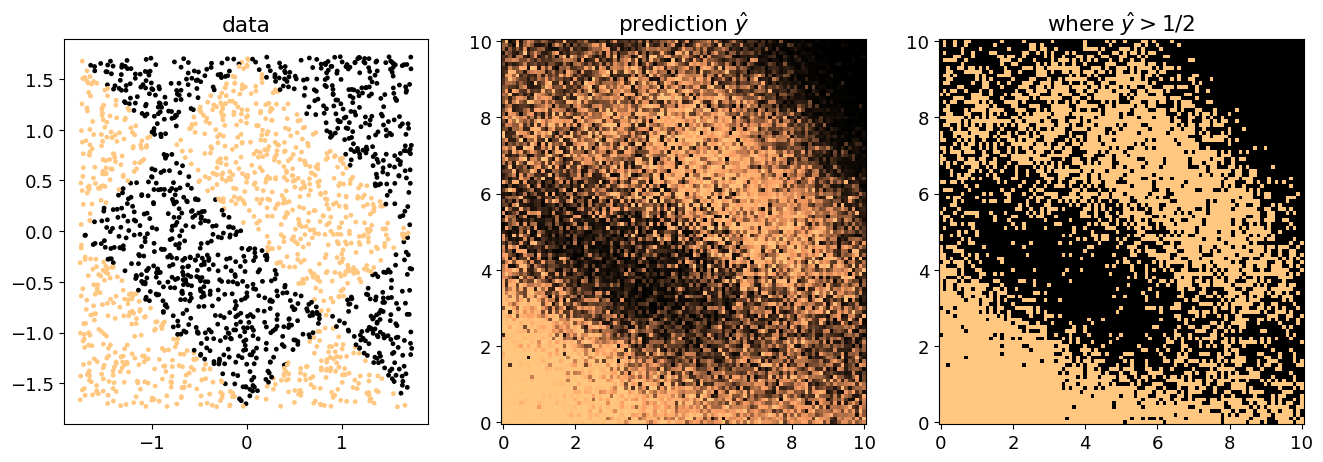

remember: these ar 2 out of L=8 dimensions, of which L-2 contain random noise


In [ ]:
dX = .1
X1 = np.arange(0,10+dX, dX)
LG = len(X1)
X, Y = np.meshgrid(X1, X1)
allXY = np.reshape((np.array((X,Y)).T),(LG**2,2))
grid = np.random.rand(LG**2,L)*B
grid[:,:2] = allXY
grid_r=Standardize(grid,x_mean,x_std)

pred = model.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y,s=6)
ax.set_title("data")
ax=AX[1]
ax.pcolormesh(X1,X1,pred.reshape((LG, LG)))
ax.set_title("prediction $\\hat y$")
ax=AX[2]
pred01=np.copy(pred)
pred01[pred>0.5]=1
pred01[pred<=0.5]=0
ax.pcolormesh(X1,X1,pred01.reshape((LG, LG)))
ax.set_title("where $\\hat y > 1/2$")
plt.show()
print(f"remember: these ar 2 out of L={L} dimensions, of which L-2 contain random noise")

### Data augmentation


AUGMENTATION:

pretend you dont have the function to generate the data. you need to create artificial ones.

small displacement and give it the same class as the original one. 
if done with moderation, it increases accuracy of the nn. if you do it too much, you risk. 

an example of augmentation is the rotation of an image with different angles (always the same image e.g. a tumor, or a cat... or whatever) but for the nn is a new sample 

In [ ]:
n_reduced=int(0.75*N)
n_augmented=N

idx=np.arange(len(x_train))
idx_reduced=np.random.choice(idx, n_reduced, replace=False)

x_train_reduced=x_train[idx_reduced]
y_train_reduced=y_train[idx_reduced]

#augmentation with small, random fluctuations applied to coordinates
noise=np.random.normal(0,1e-2, x_train.shape)
x_train_augmented=np.concatenate((x_train,x_train+noise), axis=0)
y_train_augmented=np.concatenate((y_train,y_train), axis=0)

